In [1]:
import numpy as np
import matplotlib.pyplot as plt
from planning import breadth_first_search

np.set_printoptions(precision=2)

In [2]:
def create_grid(elev_map, robot_z, map_res=0.15, safety_distance=0.15, margin=0.3, unexplored_value=0.5):
    # minimum and maximum east coordinates
    x_min = np.min(elev_map[:, 0])
    x_max = np.max(elev_map[:, 0])
    
    # minimum and maximum north coordinates
    y_min = np.min(elev_map[:, 1])
    y_max = np.max(elev_map[:, 1])

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    y_size = int((y_max - y_min)//map_res)
    x_size = int((x_max - x_min)//map_res)

    # Initialize an unexplored grid
    # unexplored: 0.5
    # free:        0
    # occupied:    1
    grid = np.zeros((x_size, y_size)) + unexplored_value
    elev_grid  = np.full((x_size, y_size), np.nan)

    # Populate the grid with obstacles
    for i in range(elev_map.shape[0]):
        x, y, z, _ = elev_map[i, :]
        dx, dy, dz = map_res, map_res, z-robot_z
        sd = safety_distance * (z > margin) # safety distance is added to points treated as obstacles
        obstacle = [
            int(np.clip((x - dx - sd - x_min)//dx, 0, x_size-1)),
            int(np.clip((x + dx + sd - x_min)//dx, 0, x_size-1)),
            int(np.clip((y - dy - sd - y_min)//dy, 0, y_size-1)),
            int(np.clip((y + dy + sd - y_min)//dy, 0, y_size-1)),
        ]
        grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = dz > margin
        elev_grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = z
    return grid, elev_grid

In [3]:
# define main parameters here
margin = 0.1 # traversable height margin
safety_distance = 0.3 # to keep away from obstacles (for grid creation)
map_res = 0.15 # map resolution
unexplored_value = 0.25 # value of unknown cells in a constructed grid

Robot Z position:  0.11376145089984613
Mean elevation height:  0.2163834724291138


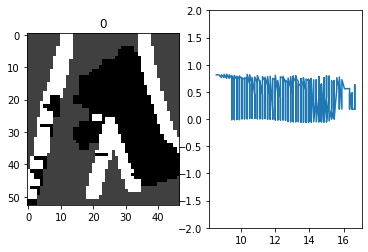

Robot Z position:  0.11409248702513314
Mean elevation height:  0.20753789298773015


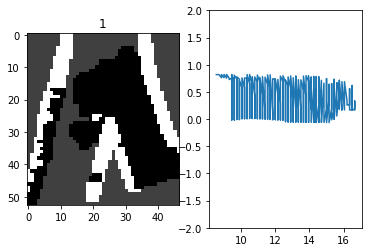

Robot Z position:  0.11474857491349036
Mean elevation height:  0.213086424297614


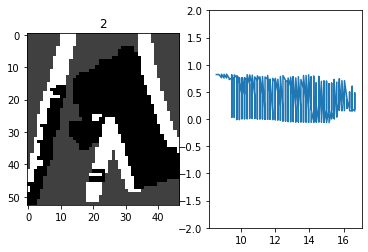

Robot Z position:  0.11405842471905475
Mean elevation height:  0.20884344219221362


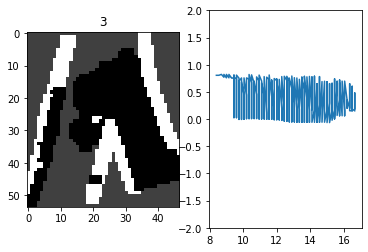

Robot Z position:  0.11459656227339154
Mean elevation height:  0.21292542467514675


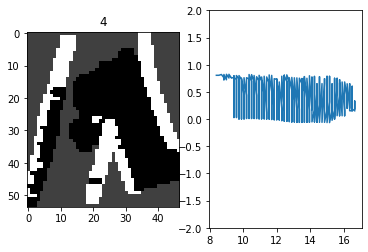

Robot Z position:  0.11391497336234671
Mean elevation height:  0.21427348167054916


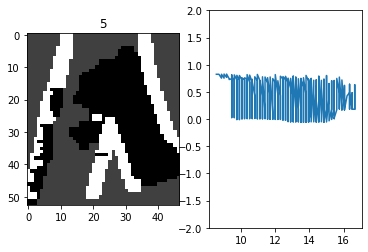

Robot Z position:  0.11457082210663738
Mean elevation height:  0.2118876106675825


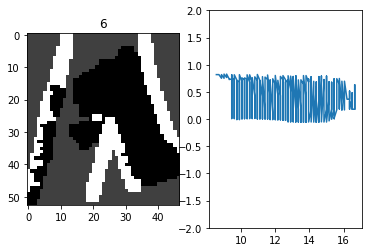

Robot Z position:  0.11399579986897798
Mean elevation height:  0.21031441549794078


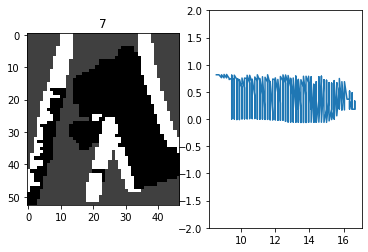

Robot Z position:  0.11406510638746425
Mean elevation height:  0.20753789298773015


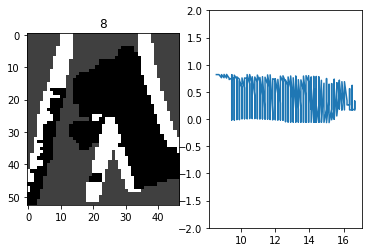

Robot Z position:  0.11438039419028559
Mean elevation height:  0.20173971058543852


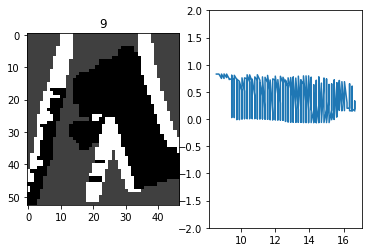

Robot Z position:  0.11443135355954016
Mean elevation height:  0.2057512328980508


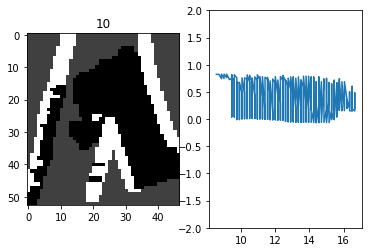

Robot Z position:  0.11474514577275861
Mean elevation height:  0.213086424297614


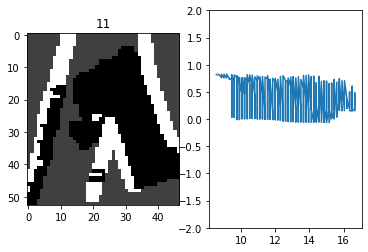

Robot Z position:  0.11414689098913176
Mean elevation height:  0.2123839095085194


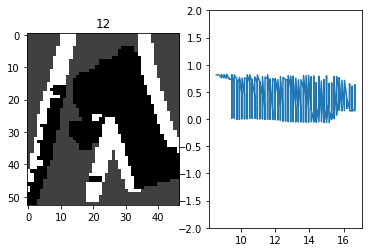

Robot Z position:  0.11413867528164695
Mean elevation height:  0.20732429842276803


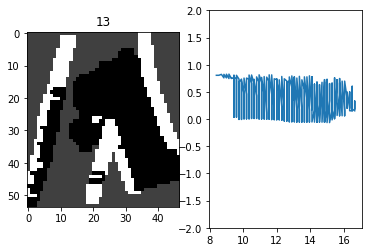

Robot Z position:  0.1140586111722514
Mean elevation height:  0.2086812947943904


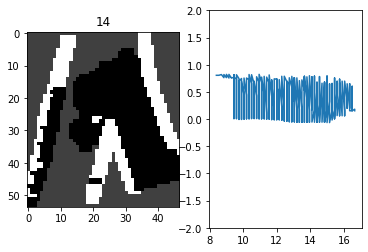

In [5]:
# read data
for ind in range(0, 15):
    elev_map = np.load('./data/elev_map{}.npy'.format(ind))
    robot_pose = np.load('./data/robot_pose{}.npy'.format(ind))
    # create occupancy grid based on elevation map
    grid, elev_grid = create_grid(elev_map, robot_pose[2], map_res, margin, safety_distance, unexplored_value)
    print('Robot Z position: ', robot_pose[2])
    X = elev_map[:,0]; Y = elev_map[:,1]; Z = elev_map[:,2]
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(grid, cmap='gray')
    plt.title(str(ind))
    
    plt.subplot(1,2,2)
    plt.plot(X,Z)
    plt.ylim([-2., 2.])
    print('Mean elevation height: ', np.mean(Z))
    plt.show();